In [1]:
import os
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt
from imageProcessing import normalizeImages, stackImages, stackMasks

In [2]:
# Import custom functions to extract our Image arrays and Pixel Mask arrays from our created fits files dataset
from dataGathering import extractImageArray, extractPixelMaskArray, extract_star_catalog
from dataGathering import getStarData, getImagePlot, getPixelMaskPlot
from dataGathering import displayRawImage, displayRawPixelMask, displayImagePlot, displayPixelMaskPlot, displayPixelMaskOverlayPlot

# Import astropy to read fits files, and os to interact with the file system
from astropy.io import fits

In [3]:
# Create images and masks arrays lists
images = []
masks = []

# Create df to store the star data inside each fits file
star_data = []

# Create a list of all the fits files in the dataset folder
fits_files = os.listdir('data/fits/')

# For all the fits files in the dataset folder specified in file_path, extract the image and mask arrays to the respective lists
file_path = 'data/fits/'
for file in os.listdir(file_path):
    if file.endswith('.png'):
        os.remove(file_path + file)
    if file.startswith('data') and file.endswith('.fits'):
        images.append(extractImageArray(file_path + file))
        masks.append(extractPixelMaskArray(file_path + file))
        star_data.append(extract_star_catalog(file_path + file))

        print(file + ' added to dataset')

data232.fits added to dataset
data69.fits added to dataset
data126.fits added to dataset
data129.fits added to dataset
data7.fits added to dataset
data23.fits added to dataset
data32.fits added to dataset
data181.fits added to dataset
data105.fits added to dataset
data192.fits added to dataset
data113.fits added to dataset
data20.fits added to dataset
data104.fits added to dataset
data182.fits added to dataset
data34.fits added to dataset
data212.fits added to dataset
data227.fits added to dataset
data122.fits added to dataset
data238.fits added to dataset
data64.fits added to dataset
data180.fits added to dataset
data108.fits added to dataset
data138.fits added to dataset
data249.fits added to dataset
data124.fits added to dataset
data30.fits added to dataset
data156.fits added to dataset
data131.fits added to dataset
data165.fits added to dataset
data16.fits added to dataset
data60.fits added to dataset
data103.fits added to dataset
data102.fits added to dataset
data70.fits added to 

In [4]:
# images = normalizeImages(images)

In [25]:
def convert_to_grayscale(image):
    """
    Convert the input image to grayscale.

    Parameters:
    image (np.ndarray): The input image.

    Returns:
    np.ndarray: The grayscale image.
    """
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def apply_gaussian_blur(image, kernel_size=(1, 1)):
    """
    Apply Gaussian blur to the input image.

    Parameters:
    image (np.ndarray): The input image.
    kernel_size (tuple): The size of the Gaussian kernel.

    Returns:
    np.ndarray: The blurred image.
    """
    return cv2.GaussianBlur(image, kernel_size, 0)

def apply_threshold(image, threshold_value=30):
    """
    Apply binary thresholding to the input image.

    Parameters:
    image (np.ndarray): The input image.
    threshold_value (int): The threshold value.

    Returns:
    np.ndarray: The binary image.
    """
    _, binary = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)
    return binary

def apply_morphological_operations(image, kernel_size=(1, 1)):
    """
    Apply morphological operations (dilation and erosion) to the input image.

    Parameters:
    image (np.ndarray): The input image.
    kernel_size (tuple): The size of the structuring element.

    Returns:
    np.ndarray: The image after morphological operations.
    """
    kernel = np.ones(kernel_size, np.uint8)
    dilated = cv2.dilate(image, kernel, iterations=9)
    eroded = cv2.erode(dilated, kernel, iterations=9)
    return eroded

def normalize_image(image):
    """
    Normalize the pixel values of the input image to the range [0, 1].

    Parameters:
    image (np.ndarray): The input image.

    Returns:
    np.ndarray: The normalized image.
    """
    min_val = np.min(image)
    max_val = np.max(image)
    normalized = (image - min_val) / (max_val - min_val)
    return normalized

def preprocessImage(image, kernel_size=(1, 1), threshold_value=100):
    """
    Preprocess the input image to enhance features for star recognition.

    Parameters:
    image (np.ndarray): The input image.
    threshold_value (int): The threshold value for binary thresholding.

    Returns:
    np.ndarray: The preprocessed image.
    """
    # Convert to 3-channel if the image is single-channel
    if image.ndim == 2 or (image.ndim == 3 and image.shape[2] == 1):
        image = np.stack([image, image, image], axis=-1)

    gray = convert_to_grayscale(image)
    blurred = apply_gaussian_blur(gray, kernel_size)
    normalized = normalize_image(blurred)
    binary = apply_threshold(normalized * 255, threshold_value)  # Scale back to 0-255 for thresholding
    morphed = apply_morphological_operations(binary)
    final_normalized = normalize_image(morphed)
    return final_normalized

In [26]:
stacked_images = stackImages(images.copy())

(250, 512, 512, 3)


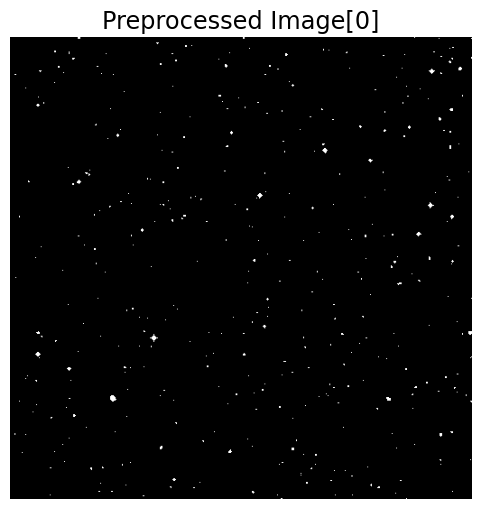

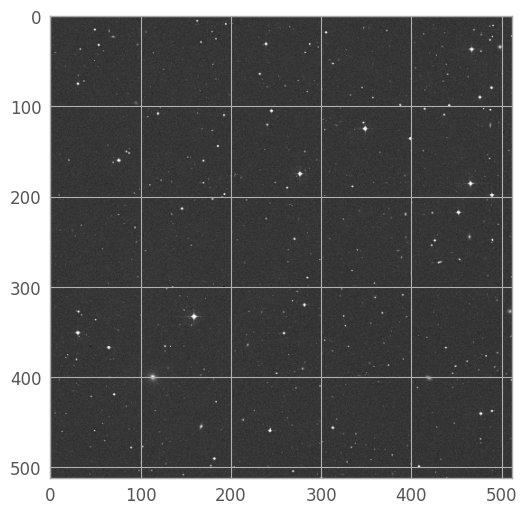

In [32]:
preprocessed_image = preprocess_image(stacked_images[0], kernel_size=(1, 1), threshold_value=100)
plt.imshow(preprocessed_image, cmap='gray')
plt.title('Preprocessed Image[0]')
plt.axis('off')
plt.show()

plt.imshow(images[0], cmap='gray')

(512, 512)

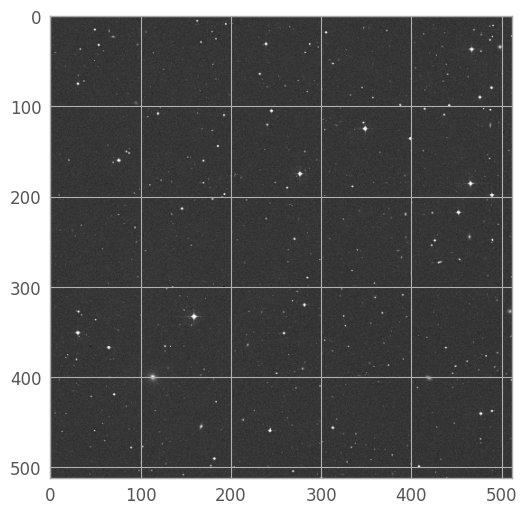

In [28]:
plt.imshow(images[0], cmap='gray')
images[0].shape